In [1]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import scipy.stats as stat
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats
import pickle
from sklearn.metrics import *
import pandas as pd

In [2]:
from dual_model_with_transfer import dual_model_sudden, dual_model_gradual
from single_model_with_transfer import model_sudden, model_gradual

In [78]:
# read fit values
fits_single = pickle.load(open('fit_single_bound_with_transfer.pickle', 'rb'))
fits_dual = pickle.load(open('fit_dual_bound_with_transfer.pickle', 'rb'))
fits_single_model_recovery = pickle.load(open('params/fit_single_bound_with_transfer_model_recovery.pickle', 'rb'))
fits_dual_model_recovery = pickle.load(open('params/fit_dual_bound_with_transfer_model_recovery.pickle', 'rb'))

curvatures_smooth = pickle.load(open('curvatures_smooth.pickle', 'rb'))
curvatures_smooth = curvatures_smooth/90.0
curvatures = pickle.load(open('curvatures.pickle', 'rb'))

In [4]:
def plot_data_vs_fits_dual(curvatures_smooth, Af, Bf, As, Bs):
    plt.figure(figsize = (20, 10))
    errors_predict = np.zeros((60, 704))
    fast = np.zeros((60, 704))
    slow = np.zeros((60, 704))
    rotation_est = np.zeros((60, 704))
    corr_coef = np.zeros(60)
    for participant in range(60):
        if participant % 4 == 0 or participant%4 == 1:
            errors_predict[participant], rotation_est[participant], fast[participant], slow[participant] = dual_model_sudden(704, Af[participant], Bf[participant], As[participant], Bs[participant])
            corr_coef[participant] = np.ma.corrcoef(errors_predict[participant], np.ravel(curvatures_smooth[participant])[64:])[0, 1]
        else:    
            errors_predict[participant], rotation_est[participant], fast[participant], slow[participant] = dual_model_gradual(704, Af[participant], Bf[participant], As[participant], Bs[participant])
            corr_coef[participant] = np.ma.corrcoef(errors_predict[participant], np.ravel(curvatures_smooth[participant])[64:])[0, 1]

    fig, ax = plt.subplots(4, dpi = 300, sharex = True, constrained_layout = True, figsize = (25, 15))
    plt.setp(ax, ylim=(-1, 2))
    legend_size = 15
    for participant in range(4):
        if participant%4 == 0  or participant%4 == 1:
            #plt.plot(np.nanmean(errors_predict[participant::4], axis = 0))
            l1, = ax[participant].plot(np.nanmean(rotation_est[participant::4], axis = 0))
            l2, = ax[participant].plot(np.nanmean(fast[participant::4], axis = 0))
            l3, = ax[participant].plot(np.nanmean(slow[participant::4], axis = 0))
            l4, = ax[participant].plot(np.append(np.ravel(np.nanmean(1 - curvatures_smooth[participant::4], axis = 0)[1:-1]), np.ravel(np.nanmean(curvatures_smooth[participant::4], axis = 0)[11])))
            ax[participant].legend([l1, l2, l3, l4], ['Rotation Est', 'Fast Est', 'Slow Est', 'Rotation Est Data'], prop={'size': legend_size})
        else:
            l1, = ax[participant].plot(np.nanmean(rotation_est[participant::4], axis = 0))
            l2, = ax[participant].plot(np.nanmean(fast[participant::4], axis = 0))
            l3, = ax[participant].plot(np.nanmean(slow[participant::4], axis = 0))
            cs = np.zeros((704))
            csm = np.nanmean(curvatures_smooth[participant::4], axis = 0)
            for i in range(9):
                cs[i*64:(i+1)*64] = (i+1)*10/90.0 - csm[i+1]
            cs[576:640] = 1 - csm[10]
            cs[640:] = csm[11]
            l4, = ax[participant].plot(cs)
            #plt.plot(np.append(np.ravel(np.nanmean(90 - curvatures_smooth[participant::4], axis = 0)[1:-1]), -np.ravel(np.nanmean(curvatures_smooth[participant::4], axis = 0)[11])))
            ax[participant].legend([l1, l2, l3, l4], ['Rotation Est', 'Fast Est', 'Slow Est', 'Rotation Est Data'], prop = {'size' : legend_size})


        ax[participant].plot(np.zeros(704), color = 'black')
        ax[0].set_ylabel('Sudden \n Speed', fontsize = 15)
        ax[1].set_ylabel('Sudden \n Accuracy', fontsize = 15)
        ax[2].set_ylabel('Gradual \n Speed', fontsize = 15)
        ax[3].set_ylabel('Gradual \n Accuracy', fontsize = 15)
    fig.suptitle('Dual Model Predictions', fontsize = 20)
    return corr_coef


array([ 0.47770601,  0.82773409,  0.72475656,  0.80113239,  0.55697776,
        0.66519744,  0.86368072,  0.86853978,  0.55516363,  0.73951923,
        0.78941548,  0.83871498,  0.77279857,  0.84441497,  0.84439052,
        0.8588599 , -0.00632991,  0.72679923,  0.68005935,  0.76871389,
        0.83997108,  0.90432383,  0.36474086,  0.66007051,  0.43336364,
        0.86582552,  0.53431306,  0.75027833,  0.55215449,  0.85263832,
        0.79482493,  0.91448836,  0.66270607,  0.77258775,  0.83845158,
        0.82528682,  0.69345985,  0.62008316,  0.74780194,  0.88904399,
        0.96024056,  0.7191617 ,  0.31940734,  0.70982939,  0.8449956 ,
        0.79360735,  0.85906112,  0.86732719,  0.78761957,  0.71553921,
        0.69402779,  0.56440874,  0.67392605,  0.38513739,  0.41659994,
        0.78445366,  0.66997223,  0.6229384 ,  0.73095526,  0.71483305])

<Figure size 1440x720 with 0 Axes>

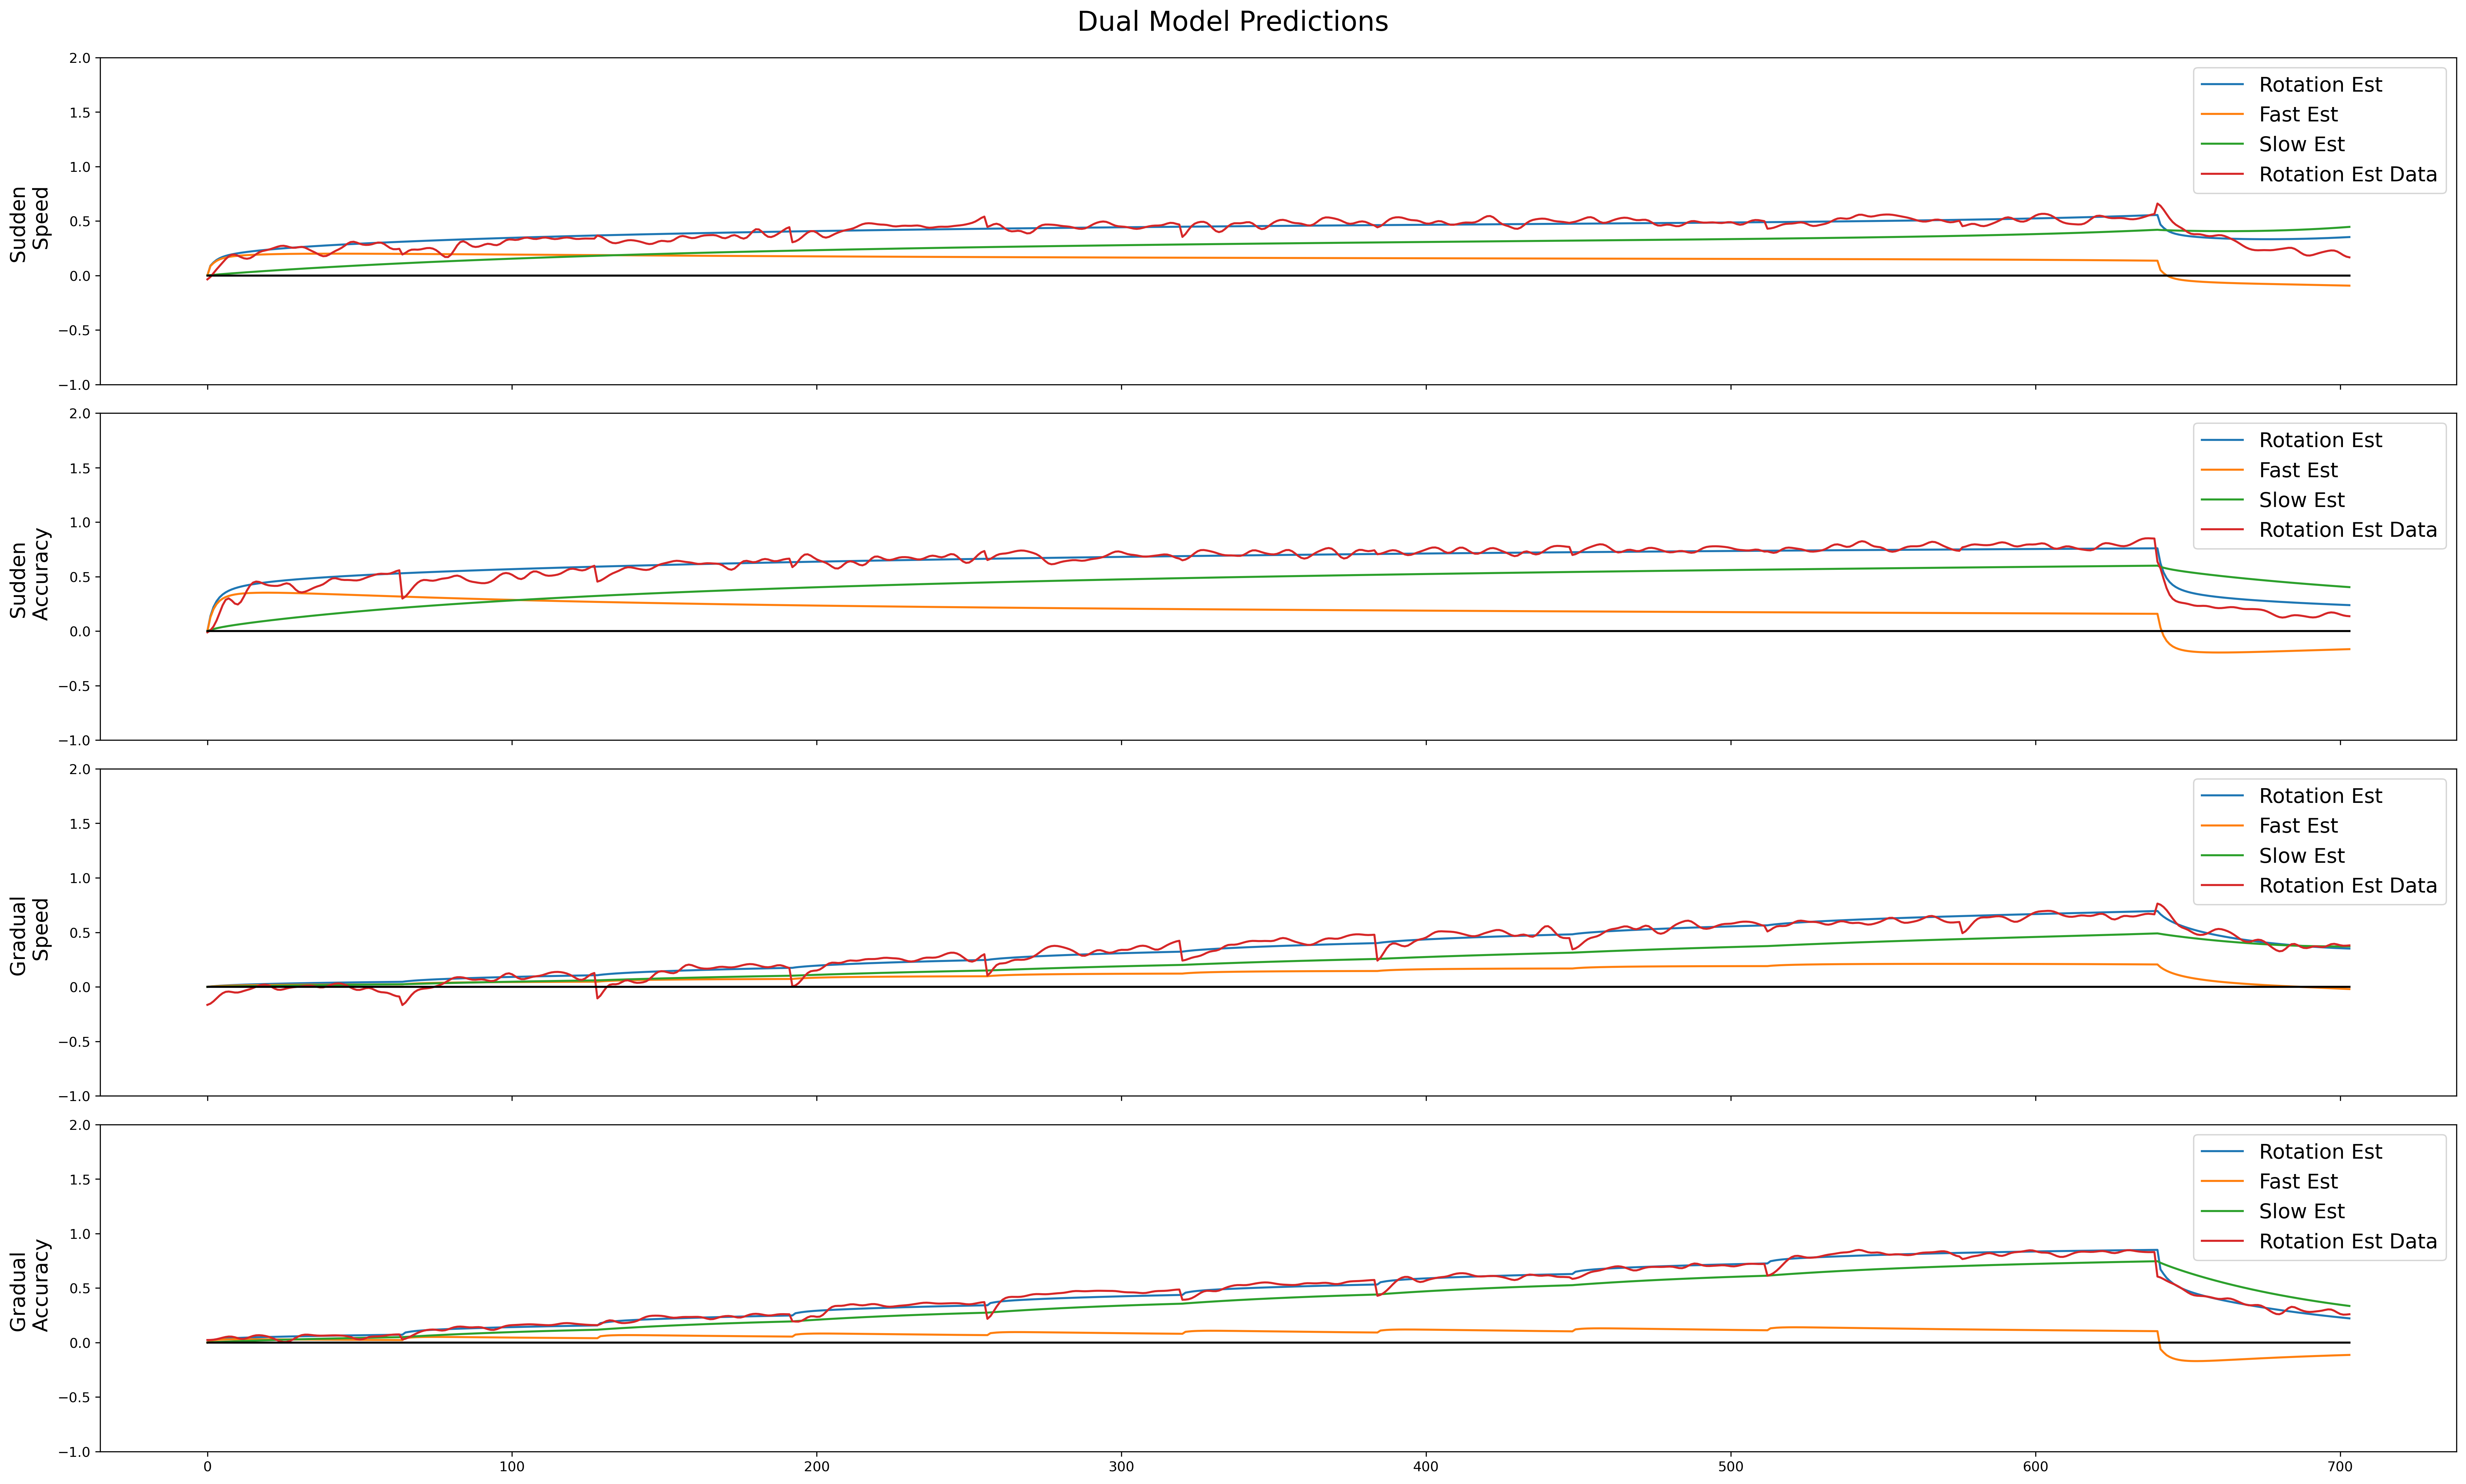

In [5]:
plot_data_vs_fits_dual(curvatures_smooth, fits_dual[:, 0], fits_dual[:, 1], fits_dual[:, 2], fits_dual[:, 3])

In [6]:
def plot_data_vs_fits_single(curvatures_smooth, A, B):
    plt.figure(figsize = (20, 10))
    errors_predict = np.zeros((60, 704))
    fast = np.zeros((60, 704))
    slow = np.zeros((60, 704))
    rotation_est = np.zeros((60, 704))
    corr_coef = np.zeros(60)
    for participant in range(60):
        if participant % 4 == 0 or participant%4 == 1:
            errors_predict[participant], rotation_est[participant] = model_sudden(704, A[participant], B[participant])
            corr_coef[participant] = np.ma.corrcoef(errors_predict[participant], np.ravel(curvatures_smooth[participant])[64:])[0, 1]
        else:    
            errors_predict[participant], rotation_est[participant] = model_gradual(704, A[participant], B[participant])
            corr_coef[participant] = np.ma.corrcoef(errors_predict[participant], np.ravel(curvatures_smooth[participant])[64:])[0, 1]

    fig, ax = plt.subplots(4, dpi = 300, sharex = True, constrained_layout = True, figsize = (25, 15))
    plt.setp(ax, ylim=(-1, 2))
    legend_size = 15
    
    for participant in range(4):
        if participant%4 == 0  or participant%4 == 1:
            #plt.plot(np.nanmean(errors_predict[participant::4], axis = 0))
            l1, = ax[participant].plot(np.nanmean(rotation_est[participant::4], axis = 0))
            l4, = ax[participant].plot(np.append(np.ravel(np.nanmean(1 - curvatures_smooth[participant::4], axis = 0)[1:-1]), np.ravel(np.nanmean(curvatures_smooth[participant::4], axis = 0)[11])))
            ax[participant].legend([l1, l4], ['Rotation Est', 'Rotation Est Data'], prop={'size': legend_size})
        else:
            l1, = ax[participant].plot(np.nanmean(rotation_est[participant::4], axis = 0))
            cs = np.zeros((704))
            csm = np.nanmean(curvatures_smooth[participant::4], axis = 0)
            for i in range(9):
                cs[i*64:(i+1)*64] = (i+1)*10/90.0 - csm[i+1]
            cs[576:640] = 1 - csm[10]
            cs[640:] = csm[11]
            l4, = ax[participant].plot(cs)
            #plt.plot(np.append(np.ravel(np.nanmean(90 - curvatures_smooth[participant::4], axis = 0)[1:-1]), -np.ravel(np.nanmean(curvatures_smooth[participant::4], axis = 0)[11])))
            ax[participant].legend([l1, l4], ['Rotation Est', 'Rotation Est Data'], prop = {'size' : legend_size})


        ax[participant].plot(np.zeros(704), color = 'black')
        ax[0].set_ylabel('Sudden \n Speed', fontsize = 15)
        ax[1].set_ylabel('Sudden \n Accuracy', fontsize = 15)
        ax[2].set_ylabel('Gradual \n Speed', fontsize = 15)
        ax[3].set_ylabel('Gradual \n Accuracy', fontsize = 15)
    fig.suptitle('Single state model predictions', fontsize = 20)
    return corr_coef


array([0.53775874, 0.80206704, 0.72469395, 0.78669342, 0.5403733 ,
       0.62165351, 0.79197932, 0.86098128, 0.17234538, 0.62404519,
       0.7885466 , 0.82557361, 0.78066527, 0.83164725, 0.84485487,
       0.83020254, 0.13558941, 0.65805324, 0.68223356, 0.75693911,
       0.79318063, 0.86882067, 0.35144335, 0.62026557, 0.4785432 ,
       0.74912951, 0.5164541 , 0.74993245, 0.49179431, 0.81663855,
       0.7947512 , 0.89344422, 0.5992681 , 0.74029444, 0.83843116,
       0.77104228, 0.63074583, 0.48384187, 0.74783771, 0.87794638,
       0.95734592, 0.53191782, 0.31947825, 0.68887193, 0.84506497,
       0.79372691, 0.85893135, 0.85483118, 0.73469999, 0.58944038,
       0.69242161, 0.56087785, 0.48559816, 0.34355214, 0.37148139,
       0.74209909, 0.6628567 , 0.46856827, 0.7094442 , 0.64439071])

<Figure size 1440x720 with 0 Axes>

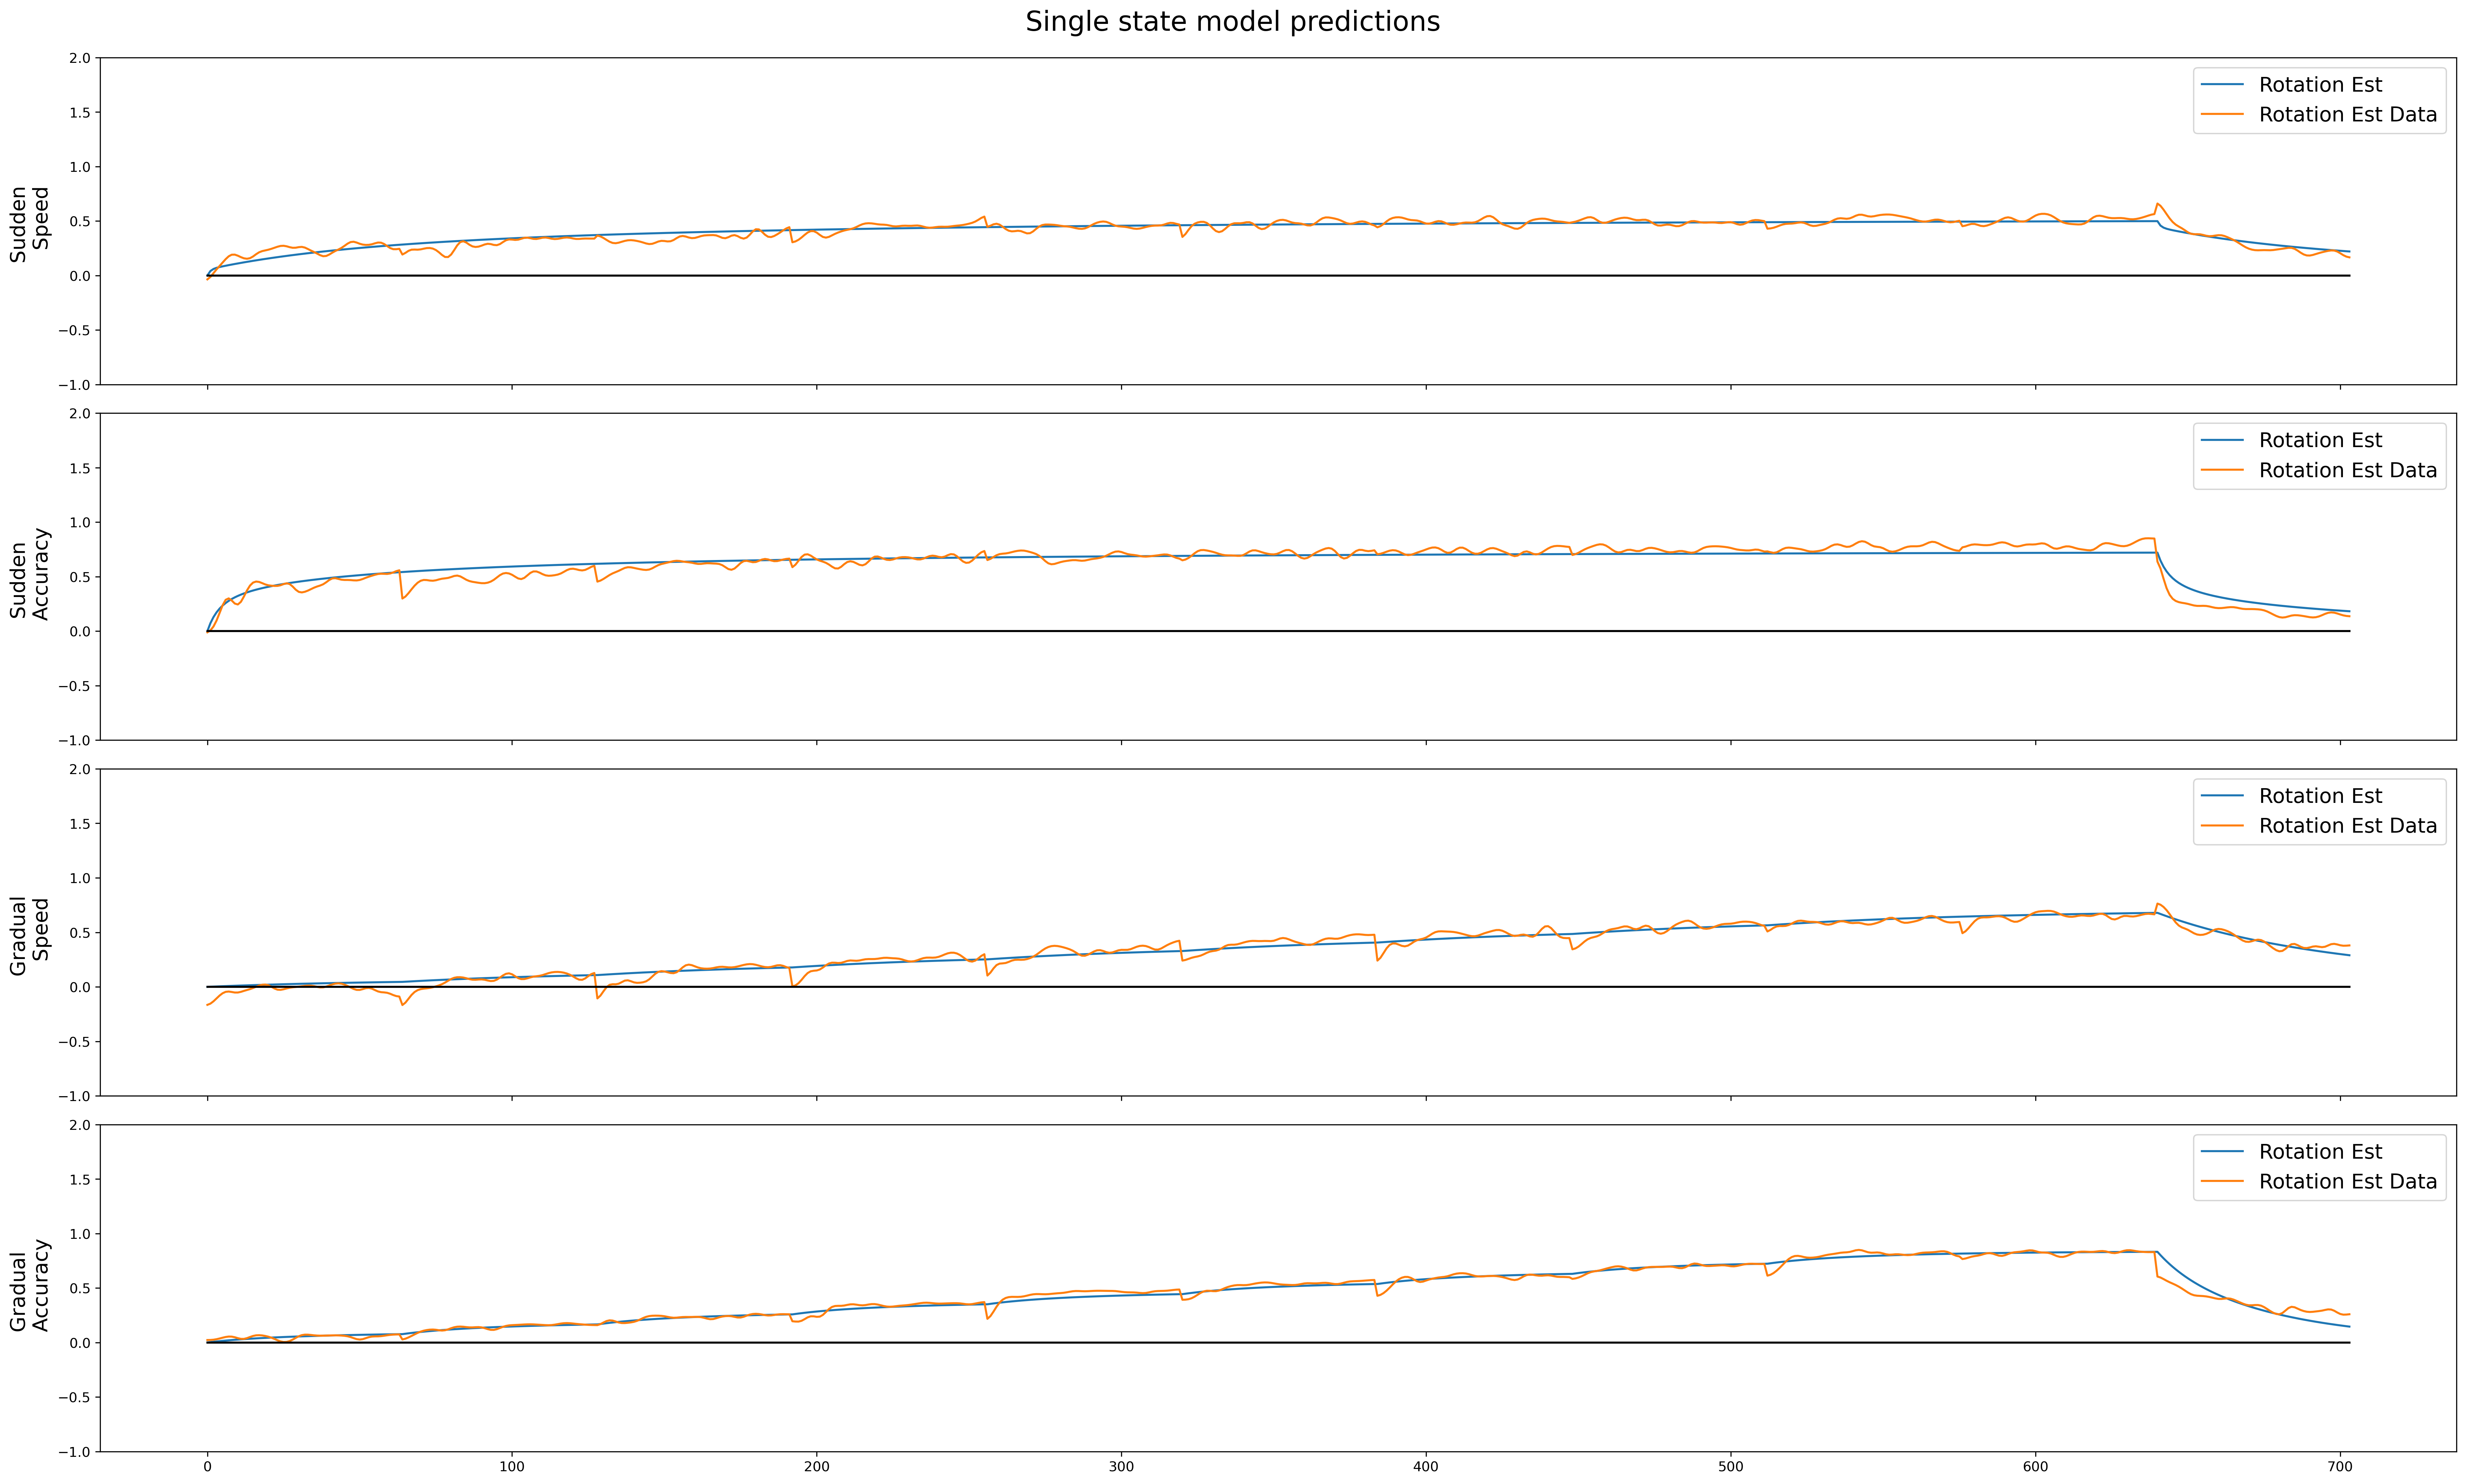

In [7]:
plot_data_vs_fits_single(curvatures_smooth, fits_single[:, 0], fits_single[:, 1])

Text(0, 0.5, 'Mean rmse')

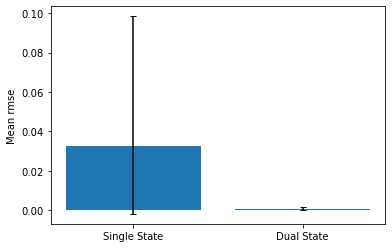

In [80]:
ci_single = stat.t.interval(alpha=0.95, df=59, loc=np.mean(fits_single_model_recovery[0::4, -1]), scale=stat.sem(fits_single_model_recovery[0::4, -1]))
ci_dual = stat.t.interval(alpha=0.95, df=59, loc=np.mean(fits_dual_model_recovery[:, -1]), scale=stat.sem(fits_dual_model_recovery[:, -1]))
plt.bar(('Single State', "Dual State"), [np.mean(fits_single_model_recovery[:, -1]), np.mean(fits_dual_model_recovery[:, -1])], yerr = ([ci_single[0], ci_dual[0]], [ci_single[1], ci_dual[1]]), capsize = 3)
plt.ylabel('Mean rmse')

In [45]:
stat.ttest_ind(fits_single[0::4, -1], fits_dual[0::4, -1])

Ttest_indResult(statistic=0.5169917253071281, pvalue=0.6092219397974497)

In [10]:
model_errors_dual = np.zeros((60, 704))
model_errors_single = np.zeros((60, 704))
model_errors_dual_recovery = np.zeros((60, 704))
model_errors_single_recovery = np.zeros((60, 704))
for participant in range(60):
    if participant%4 == 0 or participant%4 == 1:
        model_errors_dual[participant] = dual_model_sudden(704, fits_dual[participant][0], fits_dual[participant][1], fits_dual[participant][2], fits_dual[participant][3])[0]
        model_errors_single[participant] = model_sudden(704, fits_single[participant][0], fits_single[participant][1])[0]
        model_errors_dual_recovery[participant] = dual_model_sudden(704, fits_dual_model_recovery[participant][0], fits_dual_model_recovery[participant][1], fits_dual_model_recovery[participant][2], fits_dual_model_recovery[participant][3])[0]
        model_errors_single_recovery[participant] = model_sudden(704, fits_single_model_recovery[participant][0], fits_single_model_recovery[participant][1])[0]

    else:
        model_errors_dual[participant] = dual_model_gradual(704, fits_dual[participant][0], fits_dual[participant][1], fits_dual[participant][2], fits_dual[participant][3])[0]
        model_errors_single[participant] = model_gradual(704, fits_single[participant][0], fits_single[participant][1])[0]
        model_errors_dual_recovery[participant] = dual_model_gradual(704, fits_dual_model_recovery[participant][0], fits_dual_model_recovery[participant][1], fits_dual_model_recovery[participant][2], fits_dual_model_recovery[participant][3])[0]
        model_errors_single_recovery[participant] = model_gradual(704, fits_single_model_recovery[participant][0], fits_single_model_recovery[participant][1])[0]
        

In [63]:
mse_dual_groups = np.zeros(4)
mse_single_groups = np.zeros(4)
mse_dual_groups_recovery = np.zeros(4)
mse_single_groups_recovery = np.zeros(4)

for group in range(4):
    mse_dual_groups[group] = mean_squared_error(np.ravel(model_errors_dual[group::4, 640:]), np.ravel(curvatures_smooth[group::4,-1]))
    mse_dual_groups_recovery[group] = mean_squared_error(np.ravel(model_errors_single[group::4]), np.ravel(model_errors_dual_recovery[group::4]))
    
    mse_single_groups[group] = mean_squared_error(np.ravel(model_errors_single[group::4, 640:]), np.ravel(curvatures_smooth[group::4,-1]))
    mse_single_groups_recovery[group] = mean_squared_error(np.ravel(model_errors_dual[group::4]), np.ravel(model_errors_single_recovery[group::4]))
    
mse_duals = mean_squared_error(np.ravel(model_errors_dual[:, 640:]), np.ravel(curvatures_smooth[:, -1]))
mse_singles = mean_squared_error(np.ravel(model_errors_single[:, 640:]), np.ravel(curvatures_smooth[:, -1]))


In [62]:
AIC_single = np.zeros(60)
BIC_single = np.zeros(60)

mse_dual = np.zeros(60)
mse_single = np.zeros(60)


rss_dual = np.sum(model_errors_dual[:, :640] - np.reshape(curvatures_smooth[:, 1:-1], (60, 640)), axis = 1)**2
AIC_dual = 2*4 + np.log(fits_dual[:, -1])
BIC_dual = np.log(704)*4 + np.log(fits_dual[:, -1])


rss_single = np.sum(model_errors_single[:, :640] - np.reshape(curvatures_smooth[:, 1:-1], (60, 640)), axis = 1)**2
AIC_single  = 2*2 + np.log(fits_single[:, -1])
BIC_single = np.log(704)*2 + np.log(fits_single[:, -1])


In [86]:
mse_dual = mean_squared_error(model_errors_dual[2::4]*90, np.reshape(curvatures_smooth[2::4, 1:]*90, (15, 704)))
mse_single = mean_squared_error(model_errors_single[2::4]*90, np.reshape(curvatures_smooth[2::4, 1:]*90, (15, 704)))


In [87]:
AIC_dual_mse = 2*4 + np.log(mse_dual/(704*15))
AIC_single_mse = 2*2 + np.log(mse_single/(704*15))


In [76]:
sum(fits_dual[:, -1])

738.2327615786689

In [77]:
sum(fits_single[:, -1])

826.2765964411491

In [46]:
np.shape(curvatures_smooth[:, -1])

(60, 64)

In [29]:
r2_score(np.ravel(model_errors_dual), np.ravel(curvatures_smooth[:, 1:]))

-1.8435942015295161

In [30]:
r2_score(np.ravel(model_errors_single), np.ravel(curvatures_smooth[:, 1:]))

-1.7878687798910495

In [61]:
from scipy.ndimage import gaussian_filter1d
curvatures_smooth = gaussian_filter1d(curvatures, sigma = 2)
pickle.dump(curvatures_smooth, open('curvatures_smooth.pickle', 'wb'))